In [2]:
import pandas as pd
import numpy as np

index_cols = ["ID", "ARM", "TimePoint"]
category_cols = ["Risposta"]

immune_system_subpopulations = [
    "Leukocytes",
    "Neutrophils",
    "Eosinophils",
    "Basophils",
    "pDCs",
    "mDCs",
    "mDCs/cDC1",
    "mDCs/cDC2",
    "mDCs/cDC3",
    "Monocytes",
    "Monocytes/ CD14p HLADRp",
    "Classical Monocytes",
    "Intermediate Monocytes",
    "Non-classical  Monocytes",
    "Atypical Monocytes",
]

num_timestamps = 5
num_ids = 100
ids = np.repeat(np.arange(1, num_ids + 1), num_timestamps)
# assign one arm per unique subject and map it to all their timepoints
arms_per_id = np.random.choice(["Placebo", "Low Dose", "High Dose"], size=num_ids)
arms = arms_per_id[ids - 1]

timepoint = np.tile(np.arange(1, num_timestamps + 1), num_ids)

In [3]:
# Create the dataframe structure
data = {
    "ID": ids,
    "ARM": arms,
    "TimePoint": timepoint
}

# Initialize dataframe
df = pd.DataFrame(data)

# First, assign Risposta per subject ID (same response for all timepoints of same subject)
responses_per_id = np.random.choice(["Responder", "Non-Responder"], size=num_ids)
df['Risposta'] = responses_per_id[df['ID'] - 1]

# Generate values for each immune system subpopulation
for subpop in immune_system_subpopulations:
    values = []
    
    for i in range(len(df)):
        arm = df.iloc[i]["ARM"]
        tp = df.iloc[i]["TimePoint"]
        risposta = df.iloc[i]["Risposta"]
        
        # Define base range based on arm
        if arm == "Low Dose":
            base_min, base_max = 5000, 20000
        elif arm == "High Dose":
            base_min, base_max = 6000, 15000
        else:  # Placebo
            base_min, base_max = 1000, 30000
        
        # Apply timepoint multiplier only for treatment arms (not placebo) AND only for Responders
        if arm != "Placebo" and risposta == "Responder":
            if arm == "Low Dose":
                multiplier = 1.0005 * tp
            else:
                multiplier = 1.00005 * tp
            range_min = base_min * multiplier
            range_max = base_max * multiplier
        else:
            # No multiplier for Placebo or Non-Responders
            range_min = base_min
            range_max = base_max
        
        # Calculate mean and std for Gaussian sampling
        mean = (range_min + range_max) / 2
        std = (range_max - range_min)  # 99.7% of values within range (3 sigma rule)
        
        # Sample from Gaussian and clip to ensure within range
        value = np.random.normal(mean, std)
        value = np.clip(value, range_min, range_max)
        
        values.append(value)
    
    df[subpop] = values

# Set multi-index
df = df.set_index(["ID", "ARM", "TimePoint", "Risposta"])

print(f"DataFrame shape: {df.shape}")
print(f"\nFirst few rows:")
df.head(10)

DataFrame shape: (500, 15)

First few rows:


Leukocytes   Neutrophils   Eosinophils  \
ID ARM       TimePoint Risposta                                               
1  High Dose 1         Responder    6000.300000  11347.932198   6000.300000   
             2         Responder   30001.500000  12000.600000  12000.600000   
             3         Responder   18000.900000  45002.250000  35246.063719   
             4         Responder   31987.748586  24001.200000  24001.200000   
             5         Responder   30891.888466  74879.138932  30001.500000   
2  Low Dose  1         Responder   20010.000000  12528.762853  18573.109970   
             2         Responder   10005.000000  10005.000000  40020.000000   
             3         Responder   60030.000000  58638.700287  60030.000000   
             4         Responder   80040.000000  54777.698924  30982.851143   
             5         Responder  100050.000000  85695.717384  25012.500000   

                                     Basophils          pDCs          mDCs  \
ID ARM       TimePoint Risposta                                              
1  High Dose 1         Responder  12018.795950   8666.875277   8848.790268   
             2         Responder  30001.500000  12000.600000  12000.600000   
             3         Responder  18000.900000  32218.764866  18000.900000   
             4         Responder  24001.200000  24001.200000  57580.690621   
             5         Responder  44291.937567  75003.750000  68103.607367   
2  Low Dose  1         Responder  20010.000000   5002.500000   5002.500000   
             2         Responder  10005.000000  20362.070996  40020.000000   
             3         Responder  15007.500000  60030.000000  15007.500000   
             4         Responder  20010.000000  80040.000000  80040.000000   
             5         Responder  87231.308793  69284.589499  40238.530564   

                                      mDCs/cDC1      mDCs/cDC2     mDCs/cDC3  \
ID ARM       TimePoint Risposta                                                
1  High Dose 1         Responder   15000.750000   12959.334704   6136.340751   
             2         Responder   30001.500000   30001.500000  22337.379991   
             3         Responder   45002.250000   18000.900000  45002.250000   
             4         Responder   60003.000000   24001.200000  52726.874376   
             5         Responder   58766.159458   30001.500000  30001.500000   
2  Low Dose  1         Responder   18760.645700   20010.000000   5002.500000   
             2         Responder   10005.000000   16725.375833  10005.000000   
             3         Responder   17594.111850   60030.000000  60030.000000   
             4         Responder   71236.881446   20010.000000  53747.268197   
             5         Responder  100050.000000  100050.000000  25012.500000   

                                      Monocytes  Monocytes/ CD14p HLADRp  \
ID ARM       TimePoint Risposta                                            
1  High Dose 1         Responder   15000.750000             15000.750000   
             2         Responder   30001.500000             12000.600000   
             3         Responder   45002.250000             18000.900000   
             4         Responder   24001.200000             30753.768161   
             5         Responder   30001.500000             30001.500000   
2  Low Dose  1         Responder    5002.500000             20010.000000   
             2         Responder   30312.704442             40020.000000   
             3         Responder   60030.000000             49387.926066   
             4         Responder   67922.834435             53707.197604   
             5         Responder  100050.000000             59203.419683   

                                  Classical Monocytes  Intermediate Monocytes  \
ID ARM       TimePoint Risposta                                                 
1  High Dose 1         Responder         13859.256806             6000.300000   
             2         Responder  

In [4]:
# Reset index to prepare for visualization
df_reset = df[["Eosinophils"]].reset_index()

df_reset.head()

,ID,ARM,TimePoint,Risposta,Eosinophils
0,1,High Dose,1,Responder,6000.300000
1,1,High Dose,2,Responder,12000.600000
2,1,High Dose,3,Responder,35246.063719
3,1,High Dose,4,Responder,24001.200000
4,1,High Dose,5,Responder,30001.500000


/var/folders/r1/9l0x_94d47s2prkmk81tp0_r0000gn/T/ipykernel_79222/2701738857.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/r1/9l0x_94d47s2prkmk81tp0_r0000gn/T/ipykernel_79222/2701738857.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'T{tp}' for _ in responses for tp in timepoints], fontsize=10)
/var/folders/r1/9l0x_94d47s2prkmk81tp0_r0000gn/T/ipykernel_79222/2701738857.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/r1/9l0x_94d47s2prkmk81tp0_r0000gn/T/ipykernel_79222/2701738857.py:127: UserWarning: set_ticklabels() should only be used with a

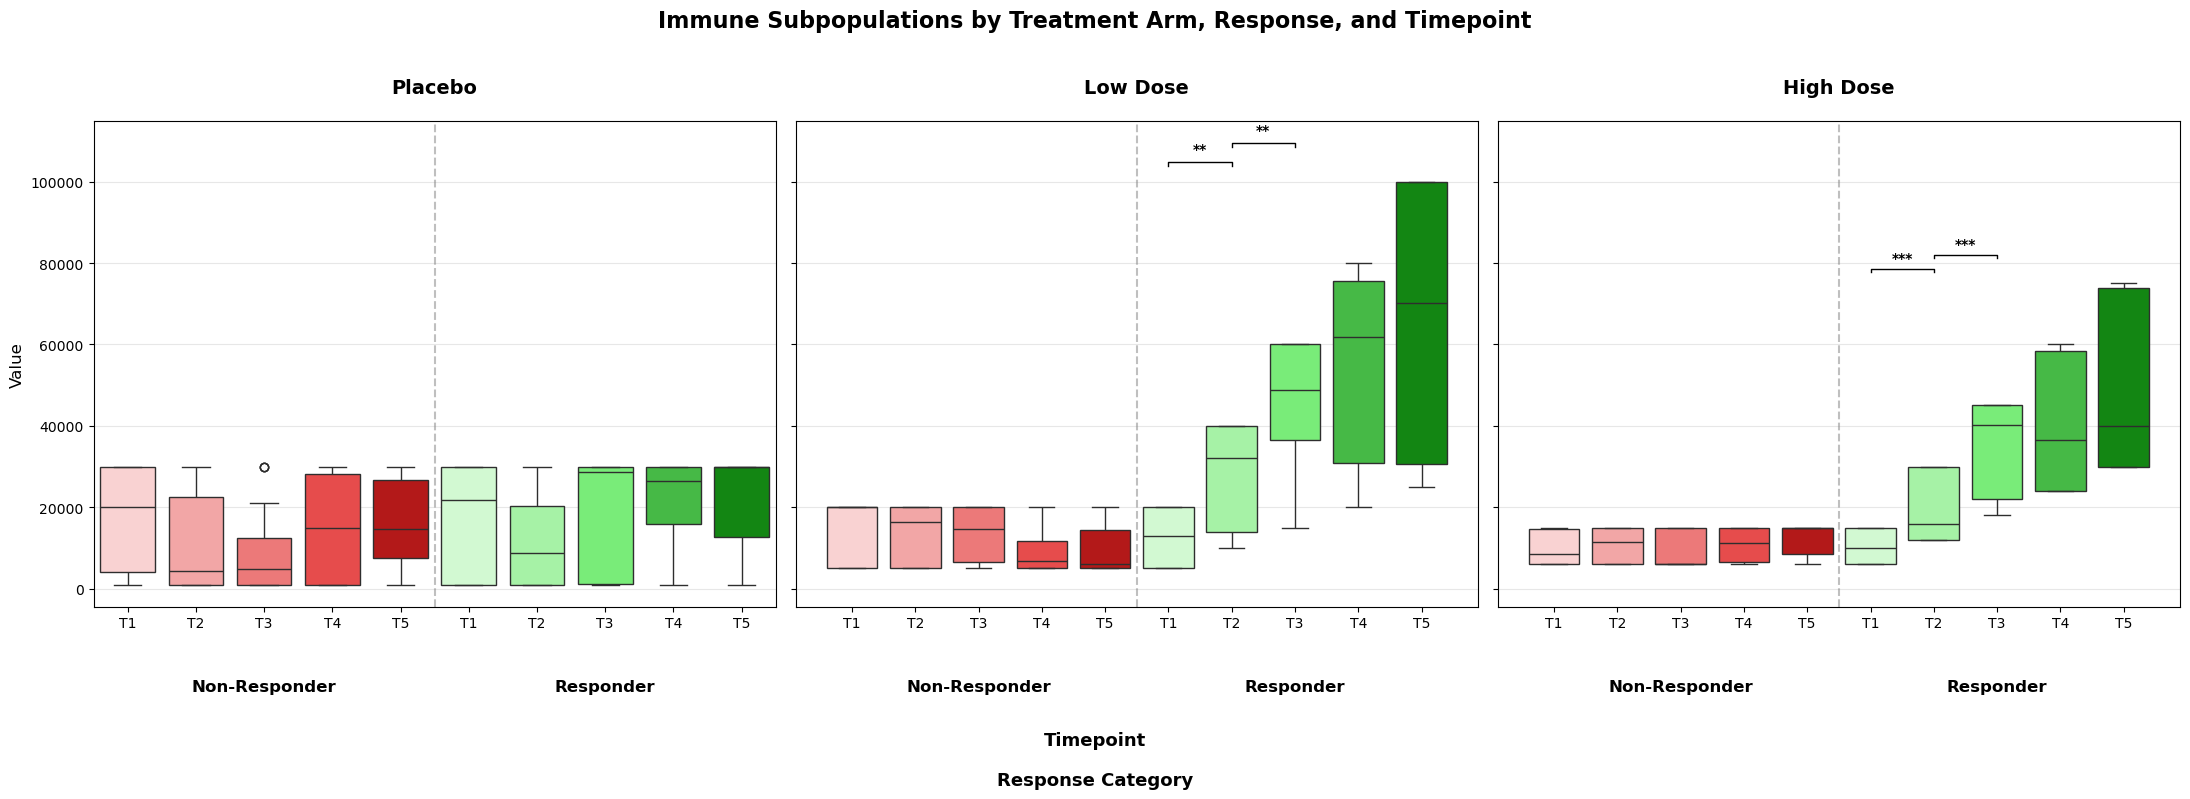

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Melt the dataframe to long format for easier plotting
df_reset = df_reset.melt(
    id_vars=['ID', 'ARM', 'TimePoint', 'Risposta'],
    value_vars=['Eosinophils'],
    var_name='Subpopulation',
    value_name='Value'
)

# Create the multi-boxplot
fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
fig.suptitle('Immune Subpopulations by Treatment Arm, Response, and Timepoint', fontsize=16, fontweight='bold', y=0.98)

arms = ['Placebo', 'Low Dose', 'High Dose']
responses = sorted(df_reset['Risposta'].unique())
timepoints = sorted(df_reset['TimePoint'].unique())

for idx, arm in enumerate(arms):
    ax = axes[idx]
    
    # Filter data for this arm
    arm_data = df_reset[df_reset['ARM'] == arm].copy()
    
    # Create combined x-axis label (Risposta_Timepoint) for positioning
    arm_data['X_Label'] = arm_data['Risposta'].astype(str) + '_T' + arm_data['TimePoint'].astype(str)
    
    # Sort to ensure correct order
    x_order = [f"{resp}_T{tp}" for resp in responses for tp in timepoints]
    
    # Create color palette: gradient from light to dark for each response type
    num_timepoints = len(timepoints)
    colors_palette = []
    
    for resp in responses:
        if resp == "Non-Responder":
            # Red gradient: light red to dark red
            colors_palette.extend([
                '#ffcccc',  # Very light red
                '#ff9999',  # Light red
                '#ff6666',  # Medium light red
                '#ff3333',  # Medium red
                '#cc0000'   # Dark red
            ][:num_timepoints])
        else:  # Responder
            # Green gradient: light green to dark green
            colors_palette.extend([
                '#ccffcc',  # Very light green
                '#99ff99',  # Light green
                '#66ff66',  # Medium light green
                '#33cc33',  # Medium green
                '#009900'   # Dark green
            ][:num_timepoints])
    
    # Create boxplot
    sns.boxplot(
        data=arm_data,
        x='X_Label',
        y='Value',
        ax=ax,
        order=x_order,
        palette=colors_palette
    )
    
    ax.set_title(f'{arm}', fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel('Value' if idx == 0 else '', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistical significance annotations
    from scipy.stats import mannwhitneyu
    
    # Compare consecutive timepoints within each response category
    y_max = arm_data['Value'].max()
    y_range = arm_data['Value'].max() - arm_data['Value'].min()
    offset = y_range * 0.05  # 5% of range for spacing
    
    for resp_idx, resp in enumerate(responses):
        resp_data = arm_data[arm_data['Risposta'] == resp]
        
        # Compare consecutive timepoints
        for tp_idx in range(len(timepoints) - 1):
            tp1 = timepoints[tp_idx]
            tp2 = timepoints[tp_idx + 1]
            
            data1 = resp_data[resp_data['TimePoint'] == tp1]['Value']
            data2 = resp_data[resp_data['TimePoint'] == tp2]['Value']
            
            # Perform Mann-Whitney U test (non-parametric)
            if len(data1) > 0 and len(data2) > 0:
                statistic, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
                
                # Determine significance level
                if p_value < 0.001:
                    sig_text = '***'
                elif p_value < 0.01:
                    sig_text = '**'
                elif p_value < 0.05:
                    sig_text = '*'
                else:
                    sig_text = 'ns'  # not significant
                
                # Only plot if significant
                if sig_text != 'ns':
                    # Calculate x positions for the bracket
                    x1 = resp_idx * len(timepoints) + tp_idx
                    x2 = resp_idx * len(timepoints) + tp_idx + 1
                    
                    # Get y position for bracket
                    y_bracket = y_max + offset * (tp_idx + 1)
                    
                    # Draw bracket
                    ax.plot([x1, x1, x2, x2], 
                           [y_bracket - offset*0.2, y_bracket, y_bracket, y_bracket - offset*0.2],
                           'k-', linewidth=1)
                    
                    # Add significance text
                    ax.text((x1 + x2) / 2, y_bracket + offset*0.3, sig_text,
                           ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Remove default x-axis label
    ax.set_xlabel('')
    
    # Create custom x-axis labels with two levels
    # First level: Timepoints (bottom)
    ax.set_xticklabels([f'T{tp}' for _ in responses for tp in timepoints], fontsize=10)
    
    # Second level: Response categories (top)
    # Add text labels for response categories
    num_timepoints = len(timepoints)
    for resp_idx, resp in enumerate(responses):
        # Calculate center position for this response group
        center_pos = resp_idx * num_timepoints + (num_timepoints - 1) / 2
        ax.text(center_pos, -0.15, resp, transform=ax.get_xaxis_transform(),
                ha='center', va='top', fontsize=12, fontweight='bold')
    
    # Add vertical separators between response groups
    for resp_idx in range(1, len(responses)):
        separator_pos = resp_idx * num_timepoints - 0.5
        ax.axvline(x=separator_pos, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)

# Adjust layout to make room for double x-axis
plt.subplots_adjust(bottom=0.15, top=0.92)

# Add common x-axis labels
fig.text(0.5, 0.06, 'Timepoint', ha='center', fontsize=13, fontweight='bold')
fig.text(0.5, 0.01, 'Response Category', ha='center', fontsize=13, fontweight='bold')

plt.tight_layout(rect=[0, 0.08, 1, 0.96])
plt.show()

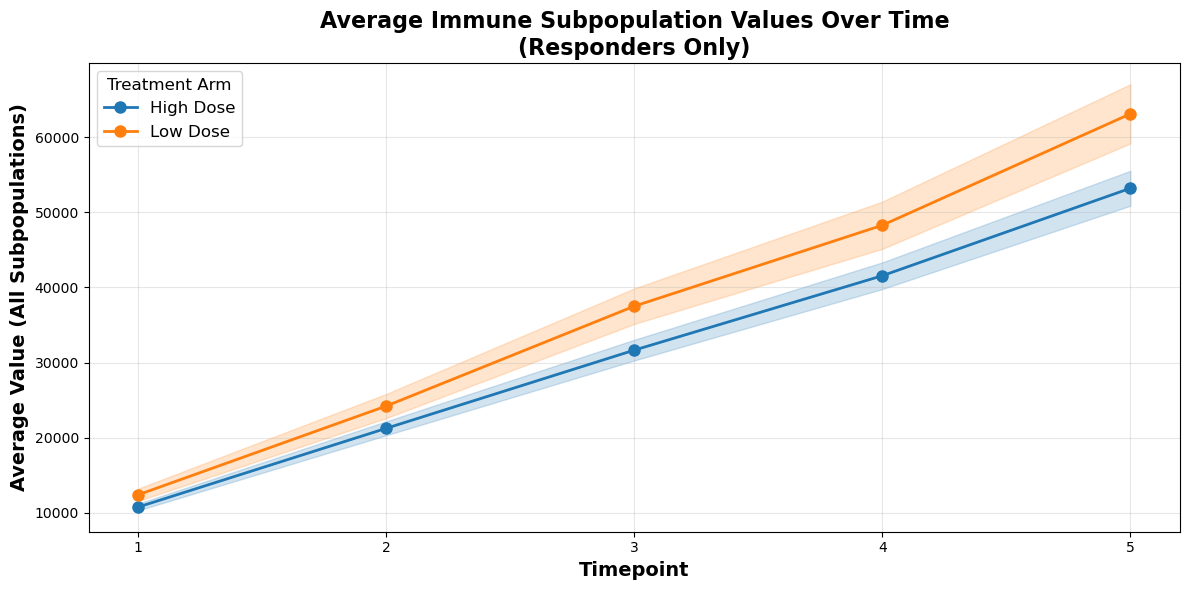

Summary Statistics:
         ARM  TimePoint          mean          sem
0  High Dose          1  10756.035571   228.117259
1  High Dose          2  21242.869009   468.524502
2  High Dose          3  31656.794772   696.146528
3  High Dose          4  41568.748887   898.104293
4  High Dose          5  53216.637602  1174.971233
5   Low Dose          1  12390.684143   413.628409
6   Low Dose          2  24212.910419   813.775496
7   Low Dose          3  37511.335897  1194.174328
8   Low Dose          4  48293.402463  1588.974264
9   Low Dose          5  63130.259886  1991.364532


In [6]:
# Prepare data for lineplot - filter for Responders only and treatment arms
df_lineplot = df.reset_index()

# Filter for Responders and exclude Placebo
df_responders = df_lineplot[(df_lineplot['Risposta'] == 'Responder') & 
                             (df_lineplot['ARM'].isin(['High Dose', 'Low Dose']))]

# Melt the dataframe to long format
df_responders_melted = df_responders.melt(
    id_vars=['ID', 'ARM', 'TimePoint', 'Risposta'],
    value_vars=immune_system_subpopulations,
    var_name='Subpopulation',
    value_name='Value'
)

# Calculate mean and standard error for each ARM and TimePoint
from scipy import stats

summary_stats = df_responders_melted.groupby(['ARM', 'TimePoint'])['Value'].agg([
    ('mean', 'mean'),
    ('sem', stats.sem)  # Standard error of the mean
]).reset_index()

# Create the lineplot
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors for each arm
colors = {'High Dose': 'C0', 'Low Dose': 'C1'}

# Plot for each ARM
for arm in ['High Dose', 'Low Dose']:
    arm_data = summary_stats[summary_stats['ARM'] == arm]
    color = colors[arm]
    
    # Plot line
    ax.plot(arm_data['TimePoint'], arm_data['mean'], 
            marker='o', linewidth=2, markersize=8, label=arm, color=color)
    
    # Add shaded error region (standard error) with matching color
    ax.fill_between(arm_data['TimePoint'], 
                     arm_data['mean'] - arm_data['sem']*1.98, 
                     arm_data['mean'] + arm_data['sem']*1.98,
                     alpha=0.2, color=color)

ax.set_xlabel('Timepoint', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Value (All Subpopulations)', fontsize=14, fontweight='bold')
ax.set_title('Average Immune Subpopulation Values Over Time\n(Responders Only)', 
             fontsize=16, fontweight='bold')
ax.legend(title='Treatment Arm', fontsize=12, title_fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_xticks(sorted(df_responders['TimePoint'].unique()))

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(summary_stats)

In [7]:
# viz da fare
# - in base al timepoint, vedere andamento delle sottopopolazioni. Facciamo: boxplot, lineplot con barre di errore.
# - heatmap con dendogrammi

----

In [15]:
df[['Basophils']].reset_index()

,ID,ARM,TimePoint,Risposta,Basophils
0,1,High Dose,1,Responder,12018.795950
1,1,High Dose,2,Responder,30001.500000
2,1,High Dose,3,Responder,18000.900000
3,1,High Dose,4,Responder,24001.200000
4,1,High Dose,5,Responder,44291.937567
...,...,...,...,...,...
495,100,Placebo,1,Non-Responder,30000.000000
496,100,Placebo,2,Non-Responder,25713.429999
497,100,Placebo,3,Non-Responder,20713.321966
498,100,Placebo,4,Non-Responder,30000.000000


In [22]:
df_to_save = df[['Basophils', "Neutrophils"]].reset_index()
df_to_save['TimePoint'] = 'T' + df_to_save['TimePoint'].astype(str)
df_to_save.to_excel("./data/clinical-example-1.xlsx", index=False)